<a href="https://colab.research.google.com/github/NISHANTH-PAPARAJU/DS-Competitions/blob/main/AnalyticsVidhya/Jobathon-21/AV_Health_Insurance_Lead_Prediction(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Third trial with Interaction parameters

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.model_selection import cross_validate, GridSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Import Data

In [5]:
train_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/AV-HealthInsurance/train_Df64byy.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/AV-HealthInsurance/test_YCcRUnU.csv')

## EDA

In [6]:
train_val.shape, test.shape

((50882, 14), (21805, 13))

In [7]:
train_val.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [8]:
train_val.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [9]:
print("No of columns: ", len(train_val.columns))

No of columns:  14


**Analysing each column:**

> **ID:** just represents the uniqueness of that particular row, thus wouldn't contain any patterns for the prediction. **(Exclude)**

> **City_Code:** Categorical - Nominal value, need to investigate the number of levels & also needs Encoding. (**Categorical - Nominal value**)

> **Region_code:** Looks Numerical, but the header indicates that it is a categorical value. Thus  need to investigate the number of levels & also needs Encoding. (**Categorical - Nominal value**)

> **Accomodation_type:** Categorical.  Thus  need to investigate the number of levels & also needs Encoding. (**Categorical - Nominal value**)

>**Reco_Insurance_Type:** Categorical. But needs investogation of what exactly it means (Is this fixed for a particular person or not?)

>**Upper_Age:** Numerical. Not exactly sure why upper_age and lower_age are provided. When the user is of a particular age. **(little confusing)**

>**Lower_Age:**: Numerical. Not exactly sure why upper_age and lower_age are provided. When the user is of a particular age. **(little confusing)**

>**Is_Spouse**: Binary value, can be encoded as 1 or 0.

>**Health Indicator:** Categorical.  Thus  need to investigate the number of levels & also needs Encoding. (**Categorical - Nominal value**)

>**Holding_policy_Duration:** Numerical. (Assuming will have a inverse correlation with the target).

>**Holding_policy_type:** Looks numerical, but with the column description it suggests that it is a categorical variable. Thus  need to investigate the number of levels & also needs Encoding. (**Categorical - Nominal value**)

>**Reco_Policy_Cat:**  Looks numerical, but with the column description it suggests that it is a categorical variable. Thus  need to investigate the number of levels & also needs Encoding. (**Categorical - Nominal value**)

>**Reco_Policy_Premium:** Numerical.

>**Response:** Binary Values

#### Categorical Columns

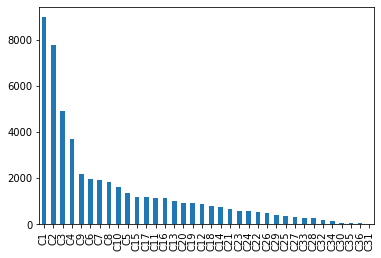

In [10]:
train_val['City_Code'].value_counts().plot(kind='bar')

**City_Code - Needs some preprocessing**

In [11]:
len(train_val['Region_Code'].unique())

5316

**Region_Code - Very high number of levels. So need to group them in order to use them in the prediction.**

Creating dummy columns for this category will lead to a very high number of columns which would lead to bad predictions.

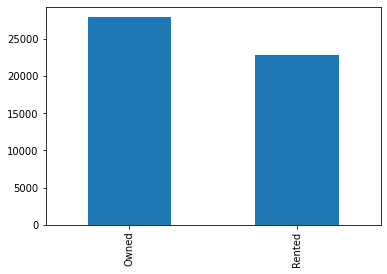

In [12]:
train_val['Accomodation_Type'].value_counts().plot(kind='bar')

**Accomodation_Type - Looks balanced and hence might not need any preprocessing.**

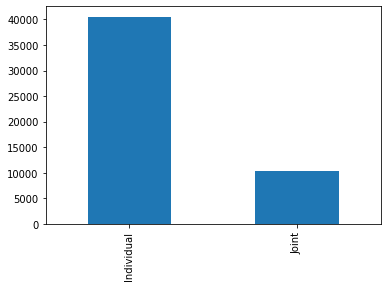

In [13]:
train_val['Reco_Insurance_Type'].value_counts().plot(kind='bar')

**Reco_Insurance_Type- Has Imbalance, but its 1:4. Could be managed without any preprocessing**

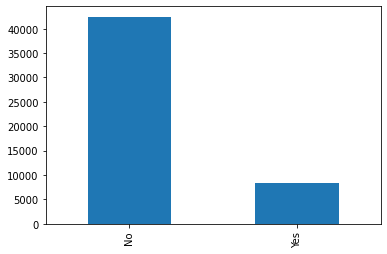

In [14]:
train_val['Is_Spouse'].value_counts().plot(kind='bar')

**Is_Spouse - It seams that the majority is the male data. Thus prediction on female data would be effected. Nothing much can be done here**

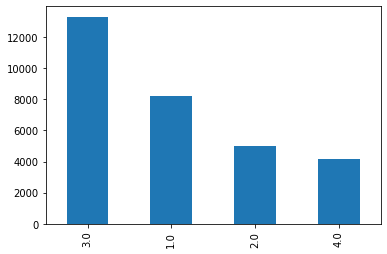

In [15]:
train_val['Holding_Policy_Type'].value_counts().plot(kind='bar')

**Holding_Policy_Type - Looks reasonably balanced, so no preprocessing required.**

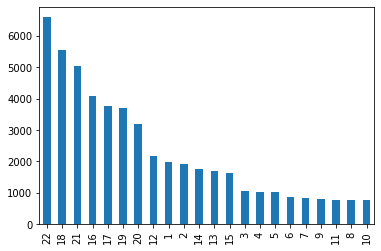

In [16]:
train_val['Reco_Policy_Cat'].value_counts().plot(kind='bar')

**Reco_Policy_Cat - Though there are imbalanced in the levels, they are still have decent number of sample even at the least, inorder for the model to capture the patterns. Thus leaving this KPI as it is without any preprocessing.**

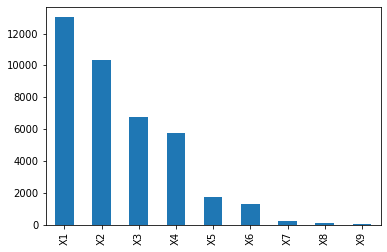

In [17]:
train_val['Health Indicator'].value_counts().plot(kind='bar')

**Health Indicator - Highly imbalanced Data. Needs some kind of preprocessing.**

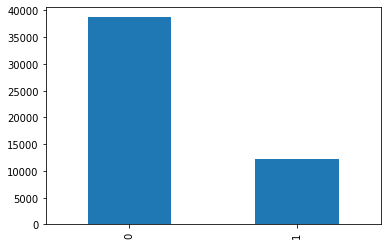

In [18]:
train_val['Response'].value_counts().plot(kind='bar')

**Finally - The target variable.
Response - High number of samples for negative class (as expected).**

Lets check the Correlations

#### Numerical Data Analysis (per Column)

In [19]:
train_val['Upper_Age'].unique()

array([36, 75, 32, 52, 44, 28, 59, 21, 66, 20, 27, 34, 43, 55, 23, 18, 22,
       25, 24, 40, 26, 56, 35, 63, 49, 64, 67, 42, 71, 57, 73, 31, 19, 48,
       65, 54, 33, 30, 69, 68, 37, 29, 62, 58, 38, 39, 60, 41, 45, 51, 46,
       70, 61, 74, 53, 72, 50, 47])

In [20]:
train_val['Lower_Age'].unique() 

array([36, 22, 32, 48, 44, 52, 28, 73, 43, 26, 21, 47, 66, 20, 27, 34, 55,
       23, 18, 25, 24, 56, 35, 63, 64, 67, 75, 42, 71, 68, 31, 19, 65, 54,
       33, 74, 30, 69, 29, 62, 58, 39, 60, 57, 41, 40, 45, 37, 51, 59, 49,
       38, 46, 70, 61, 53, 16, 72, 50, 17])

In [21]:
train_val['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [22]:
train_val['Holding_Policy_Duration'].dtype

dtype('O')

In [23]:
train_val['Reco_Policy_Premium'].unique(), len(train_val['Reco_Policy_Premium'].unique())

(array([11628., 30510.,  7450., ..., 25726.,  6156., 11374.]), 6977)

For convinience let us treat the 14+ values as some big number such as 20, so that we can treat this column as Numerical. (Completely Vague assumption, but can be refined later if needed)

In [24]:
len(train_val[train_val['Holding_Policy_Duration'] == '14+'])

4335

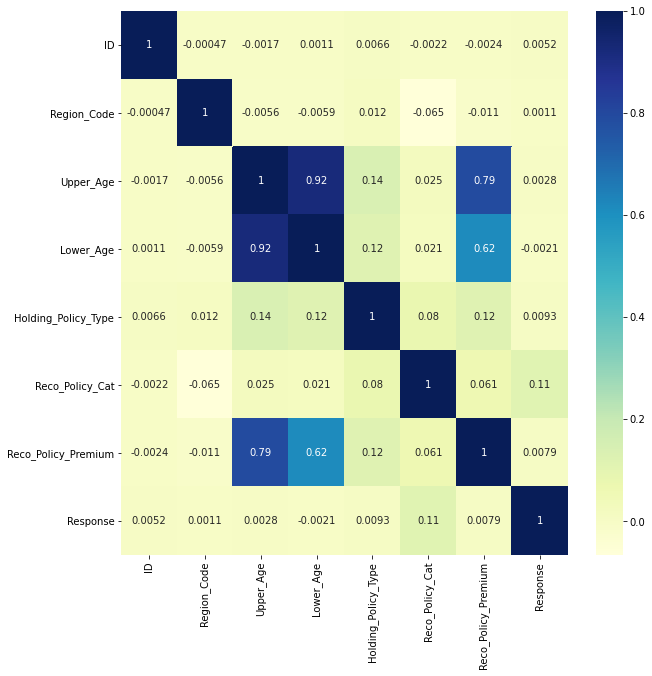

In [25]:
corr = train_val.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

**Observations:** 

1. Recommended Policy Premium is correlated highly with Upper & Lower age.
2. Recommended Policy Category seams the best predictor for the response from the correlation matrix. (will be analysed later)
- But this is a categorical column and hence shouldn't go by the correlation coefficient.
3. Lower_Age & Upper_Age are highly Correlated. (Probably a combination of which can be taken as a KPI having a stronger effect on the target)

## Pre-Processing Data

### Check Missing values

In [26]:
train_val.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [27]:
train_val.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


>As the count of `Holding policy Duration` and the `Holding_Policy_Type` matches, the odds are that the individuals who didn't have any holding policy are represented in that way.

>To confirm our assumption even further, lets check if the same rows of data are having both `Holding policy Duration` and the `Holding_Policy_Type` as null.

In [28]:
train_val[train_val['Holding_Policy_Duration'].isnull()]['Holding_Policy_Type'].unique()

array([nan])

**Conclude:** Concluding that most probably that is the case. Hence imputing the two columns.

In [29]:
train_val_proc = train_val.copy()
train_val_proc['Holding_Policy_Duration'].fillna(value=0.0, inplace=True)
train_val_proc.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [30]:
train_val_proc['Holding_Policy_Type'].fillna(value=0.0, inplace=True)
train_val_proc.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


As the Health Indicator - Not provided is just another category, lets impute those values with a new level (Not Provided)

In [31]:
train_val_proc['Health Indicator'].fillna(value='Not-Provided', inplace=True)
train_val_proc.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,Not-Provided,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [32]:
train_val_proc.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

### Changes in numerical columns

In [33]:
train_val_proc.replace({'Holding_Policy_Duration': {'14+': '20'}}, inplace=True)
train_val_proc['Holding_Policy_Duration'] = train_val_proc['Holding_Policy_Duration'].astype('float')

### Miscellaneous

As ID column is just a unique value and doesnt represent any relationship with the response, lets convert that column to be the index for our dataframe

In [34]:
train_val_proc.set_index('ID', inplace=True)
train_val_proc.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,,,,,,,,,,,,,
1,C3,3213,Rented,Individual,36,36,No,X1,20.0,3.0,22,11628.0,0
2,C5,1117,Owned,Joint,75,22,No,X2,0.0,0.0,22,30510.0,0
3,C5,3732,Owned,Individual,32,32,No,Not-Provided,1.0,1.0,19,7450.0,1
4,C24,4378,Owned,Joint,52,48,No,X1,20.0,3.0,19,17780.0,0
5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


Lets Remove `Region Code` from the analysis, as the city_code represents the region on the broaded perspective...

We will come back to this later and check how region can be included

In [35]:
train_val_proc.drop(labels=['Region_Code'], axis=1, inplace=True)
train_val_proc.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,,,,,,,,,,,,
1,C3,Rented,Individual,36,36,No,X1,20.0,3.0,22,11628.0,0
2,C5,Owned,Joint,75,22,No,X2,0.0,0.0,22,30510.0,0
3,C5,Owned,Individual,32,32,No,Not-Provided,1.0,1.0,19,7450.0,1
4,C24,Owned,Joint,52,48,No,X1,20.0,3.0,19,17780.0,0
5,C8,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### Add Dummies

In [36]:
train_val_proc_onehot = train_val_proc.copy()
train_val_proc_onehot = pd.get_dummies(train_val_proc_onehot, prefix=['City','Accom', 'InsTyp', 'Spouse', 'HI', 'Hol_PT', 'Reco_cat'],
                                    columns=['City_Code','Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
                                             'Health Indicator','Holding_Policy_Type', 'Reco_Policy_Cat']
                                    # ,drop_first=True  # excluded as when run on the Val/Test Data then it can delete a different row, which can cause problems
                                    )
train_val_proc_onehot.head()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium,Response,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C30,City_C31,City_C32,City_C33,City_C34,City_C35,City_C36,City_C4,City_C5,City_C6,City_C7,City_C8,...,InsTyp_Joint,Spouse_No,Spouse_Yes,HI_Not-Provided,HI_X1,HI_X2,HI_X3,HI_X4,HI_X5,HI_X6,HI_X7,HI_X8,HI_X9,Hol_PT_0.0,Hol_PT_1.0,Hol_PT_2.0,Hol_PT_3.0,Hol_PT_4.0,Reco_cat_1,Reco_cat_2,Reco_cat_3,Reco_cat_4,Reco_cat_5,Reco_cat_6,Reco_cat_7,Reco_cat_8,Reco_cat_9,Reco_cat_10,Reco_cat_11,Reco_cat_12,Reco_cat_13,Reco_cat_14,Reco_cat_15,Reco_cat_16,Reco_cat_17,Reco_cat_18,Reco_cat_19,Reco_cat_20,Reco_cat_21,Reco_cat_22
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,36,36,20.0,11628.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,75,22,0.0,30510.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,32,32,1.0,7450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,52,48,20.0,17780.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,44,44,3.0,10404.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Pre-Processing Categorical Columns

In [37]:
Needs_processing = ["City_Code", "Health Indicator"]

Holding it, as unable to clearly identify a method

Response variable Imbalance is handled by Class_weights

### Function for Pre-Processing

In [38]:
def pre_process_data(df, group_UA_LA = False, drop_UA_LA = False, fourteenPlusConversion = '20'):
    """
    Take the dataframe as input and return the preprocessed dataframe.
    """
    df_proc = df.copy()

    # Impute Missing Values
    df_proc['Holding_Policy_Duration'].fillna(value=0.0, inplace=True)
    df_proc['Holding_Policy_Type'].fillna(value=0.0, inplace=True)
    df_proc['Health Indicator'].fillna(value='Not-Provided', inplace=True)

    # Changes in Numerical Columns
    df_proc.replace({'Holding_Policy_Duration': {'14+': fourteenPlusConversion}}, inplace=True)
    df_proc['Holding_Policy_Duration'] = df_proc['Holding_Policy_Duration'].astype('float')

    # Miscellaneous
    df_proc.set_index('ID', inplace=True)
    df_proc.drop(labels=['Region_Code'], axis=1, inplace=True)

    # UA, LA
    if group_UA_LA:
      df_proc["UA_LA"] = (df_proc["Upper_Age"] * df_proc['Lower_Age']) / (df_proc["Upper_Age"] + df_proc['Lower_Age'])
    
    if drop_UA_LA:
      df_proc.drop(labels=["Upper_Age", "Lower_Age"], axis=1, inplace=True)

    df_proc_onehot = df_proc.copy()
    df_proc_onehot = pd.get_dummies(df_proc_onehot, prefix=['City','Accom', 'InsTyp', 'Spouse', 'HI', 'Hol_PT', 'Reco_cat'],
                                    columns=['City_Code','Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
                                             'Health Indicator','Holding_Policy_Type', 'Reco_Policy_Cat']
                                    # ,drop_first=True # excluded as when run on the Val/Test Data then it can delete a different row, which can cause problems
                                    )
    return df_proc_onehot

In [39]:
train_val_proc_onehot = pre_process_data(train_val, fourteenPlusConversion='25')

In [40]:
train_val_proc_onehot.shape

(50882, 84)

### Train-Validation Split

In [41]:
X = train_val_proc_onehot.drop('Response', axis=1)
y = train_val_proc_onehot['Response']

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=12)

## Modelling

### Without Interactions

#### Stats Model

In [43]:
stats_logit = sm.Logit(y_train, X_train).fit()
stats_logit.summary()

Optimization terminated successfully.
         Current function value: 0.526074
         Iterations 10


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                35617
Model:                          Logit   Df Residuals:                    35540
Method:                           MLE   Df Model:                           76
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:                 0.04560
Time:                        14:59:07   Log-Likelihood:                -18737.
converged:                       True   LL-Null:                       -19632.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Upper_Age                   0.0026      0.003      0.846      0.398      -0.003       0.009
Lower_Age                  -0.0005      0.003     -0.203      0.840      -0.006       0.005
Holding_Policy_Duration     0.0067      0.002      3.091      0.002       0.002       0.011
Reco_Policy_Premium     -4.915e-06   4.55e-06     -1.080      0.280   -1.38e-05    4.01e-06
City_C1                     0.4562        nan        nan        nan         nan         nan
City_C10                    0.4939        nan        nan        nan         nan         nan
City_C11                    0.4214        nan        nan        nan         nan         nan
City_C12                    0.5172        nan        nan        nan         nan         nan
City_C13                    0.8734        nan        nan        nan         nan         nan
City_C14                    0.4987        nan        nan        nan         nan         nan
City_C15                    0.3651        nan        nan        nan         nan         nan
City_C16                    0.5164        nan        nan        nan         nan         nan
City_C17                    0.6510        nan        nan        nan         nan         nan
City_C18                    0.5190        nan        nan        nan         nan         nan
City_C19                    1.0342        nan        nan        nan         nan         nan
City_C2                     0.5321        nan        nan        nan         nan         nan
City_C20                    0.5378        nan        nan        nan         nan         nan
City_C21                    0.4189        nan        nan        nan         nan         nan
City_C22                    0.4522        nan        nan        nan         nan         nan
City_C23                    0.6718        nan        nan        nan         nan         nan
City_C24                    0.6546        nan        nan        nan         nan         nan
City_C25                    0.7329        nan        nan        nan         nan         nan
City_C26                    0.4331        nan        nan        nan         nan         nan
City_C27                    0.9471        nan        nan        nan         nan         nan
City_C28                    0.9375        nan        nan        nan         nan         nan
City_C29                    0.6183        nan        nan        nan         nan         nan
City_C3                     0.5023        nan        nan        nan         nan         nan
City_C30                    1.0768        nan        nan        nan         nan         nan
City_C31                   -0.3021        nan        nan        nan         nan         nan
City_C32                    1.1182        nan        nan        nan         nan         nan
City_C33                    0.6888        nan        nan        nan         nan         nan
City_C34                    0.8867        nan        nan        nan         nan         nan
City_C35             

In [44]:
y_preds_sm = stats_logit.predict(X_val)
roc_auc_score(y_val, y_preds_sm)

0.6215010976560534

#### Logistic Regression

In [45]:
class_weights = dict(1 - (y_train.value_counts())/len(y_train))
class_weights

{0: 0.24011005980290312, 1: 0.7598899401970969}

In [46]:
log_reg = LogisticRegression(max_iter = 200, class_weight=class_weights)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0,
                   class_weight={0: 0.24011005980290312, 1: 0.7598899401970969},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=200, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

Lets plot the ROC Curve to decide on the best threshould...

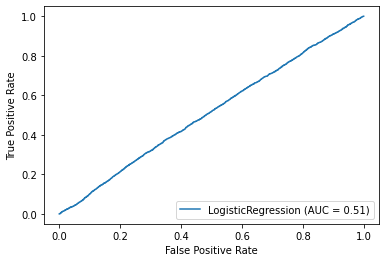

In [47]:
plot_roc_curve(log_reg,X_val, y_val)

In [48]:
y_preds_lr = log_reg.predict(X_val)
roc_auc_score(y_val, y_preds_lr)

0.5104692986101257

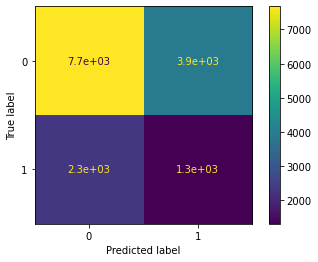

In [49]:
plot_confusion_matrix(log_reg, X_val, y_val)

#### Random Forest

In [50]:
rfc = RandomForestClassifier(class_weight=class_weights, n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.24011005980290312,
                                     1: 0.7598899401970969},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_preds_rfc = rfc.predict(X_val)
roc_auc_score(y_val, y_preds_rfc)

0.528337410556909

Feature Importances...

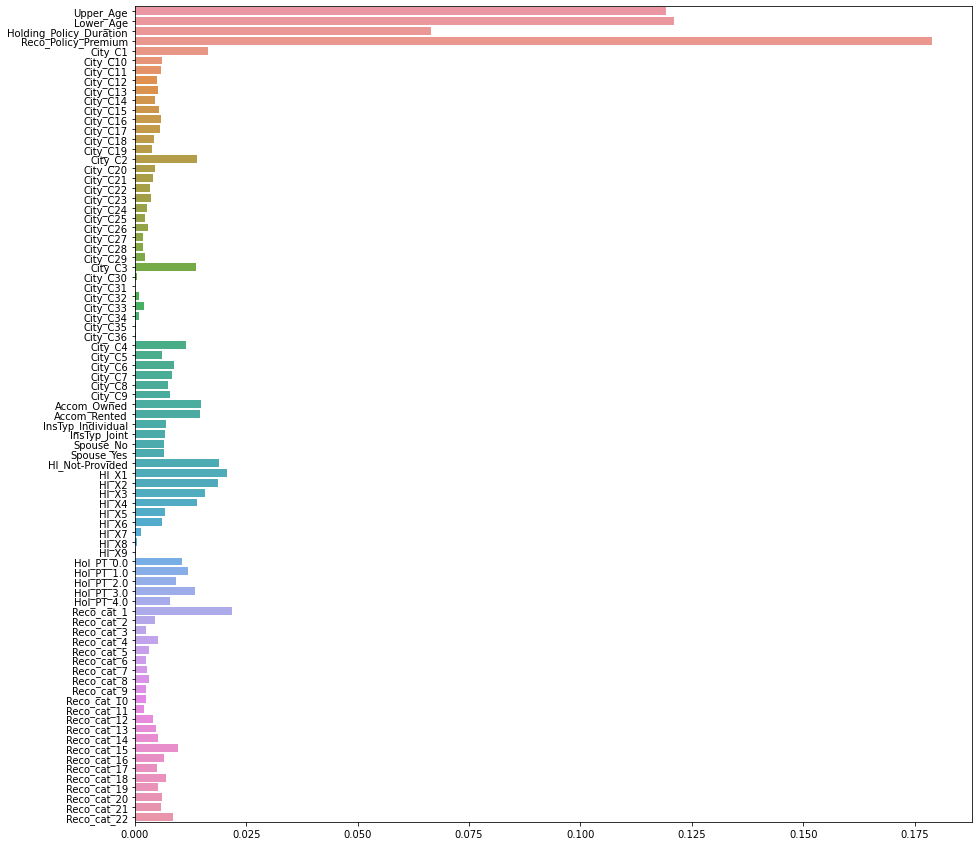

In [52]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x=rfc.feature_importances_, y=X_train.columns, orient="h")

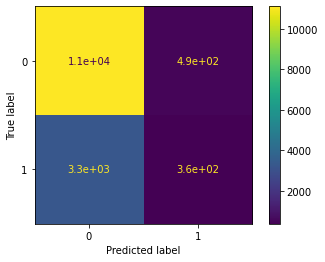

In [53]:
plot_confusion_matrix(rfc, X_val, y_val)

Lets plot the ROC Curve to decide on the best threshould...

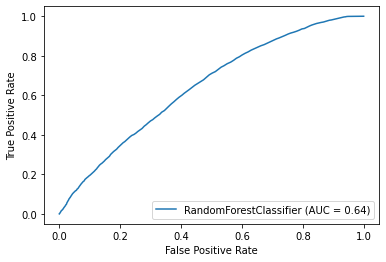

In [54]:
plot_roc_curve(rfc,X_val, y_val)

We want to boost the True Positive Rate, i.e the Recall, i.e the portion of positive samples which are correctly Identified

##### Function for Getting Best Threshold

In [55]:
def get_best_threshold(y_true, y_probs, slice_probs=True):
    """
    Takes the true labels & the predicted probabilities and
    returns the best thresold for the given criteria.
    """
    if slice_probs:
      # keep probabilities for the positive outcome only
      y_probs_true = y_probs[:, 1]
    else:
      y_probs_true = y_probs[:]
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(y_true, y_probs_true)
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    best_threshold = thresholds[ix]
    best_gmeans = gmeans[ix]
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    return best_threshold, best_gmeans

In [56]:
y_preds_proba_rfc = rfc.predict_proba(X_val)
best_threshold, _ = get_best_threshold(y_val, y_preds_proba_rfc)

Best Threshold=0.223333, G-Mean=0.601


In [57]:
y_pred_rfc_thr = (pd.Series(y_preds_proba_rfc[:,1]) >= best_threshold).astype(int)
roc_auc_score(y_val, y_pred_rfc_thr)

0.6027982361367331

In [58]:
confusion_matrix(y_val, y_pred_rfc_thr)

array([[6440, 5168],
       [1277, 2380]])

#### Gradient Boost

In [59]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [60]:
y_preds_gb = GB.predict(X_val)
roc_auc_score(y_val, y_preds_gb)

0.5038302179839953

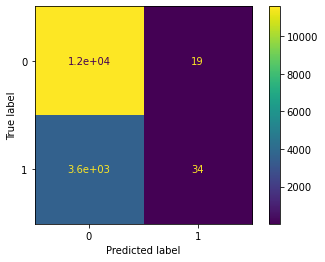

In [61]:
plot_confusion_matrix(GB, X_val, y_val)

#### XGBoost

In [62]:
from xgboost import XGBClassifier

In [63]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
y_preds_xgb = xgb.predict(X_val)
roc_auc_score(y_val, y_preds_xgb)

0.5012024488029057

In [65]:
y_preds_proba_xgb = xgb.predict_proba(X_val)
best_threshold_xgb, _ = get_best_threshold(y_val, y_preds_proba_xgb)

Best Threshold=0.235111, G-Mean=0.596


In [66]:
y_pred_xgb_thr = (pd.Series(y_preds_proba_xgb[:,1]) >= best_threshold_xgb).astype(int)
roc_auc_score(y_val, y_pred_xgb_thr)

0.5978892311545487

#### Neural Net

In [298]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, softmax
from keras.optimizers import Adam
from keras.metrics import AUC
from keras.losses import CategoricalCrossentropy
import keras

In [297]:
NN = Sequential()
NN.add(Dense(16, input_shape=(len(X_train.columns),), activation='relu'))
NN.add(Dense(32, activation='relu'))
NN.add(Dense(2, activation='softmax'))

In [288]:
NN.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                1344      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 66        
Total params: 1,954
Trainable params: 1,954
Non-trainable params: 0
_________________________________________________________________


In [299]:
NN.compile(optimizer=Adam(lr=0.001), loss=CategoricalCrossentropy(), metrics=AUC())

In [290]:
def get_labels_as_tuples(labels):
  """
  Takes in 1D labels and then converts them into two dimension labels and returns it.
  """
  labels_2D = pd.DataFrame(labels)
  labels_2D['Negate_Response'] = (1-labels)
  return labels_2D

In [312]:
# create early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor="val_auc_7",
                                                  patience=5)

In [310]:
y_train_2D = get_labels_as_tuples(y_train)
y_val_2D = get_labels_as_tuples(y_val)
y_2D = get_labels_as_tuples(y)
valid_set = tuple(zip(X_val.to_numpy(), y_val.to_numpy()))

In [313]:
NN.fit(X_train, y_train_2D, batch_size=32, epochs=50, shuffle=True, verbose=2, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/50
780/780 - 1s - loss: 0.5478 - auc_7: 0.7630 - val_loss: 0.5592 - val_auc_7: 0.7529
Epoch 2/50
780/780 - 1s - loss: 0.5479 - auc_7: 0.7598 - val_loss: 0.5592 - val_auc_7: 0.7529
Epoch 3/50
780/780 - 1s - loss: 0.5479 - auc_7: 0.7616 - val_loss: 0.5593 - val_auc_7: 0.7529
Epoch 4/50
780/780 - 1s - loss: 0.5478 - auc_7: 0.7623 - val_loss: 0.5591 - val_auc_7: 0.7529
Epoch 5/50
780/780 - 1s - loss: 0.5479 - auc_7: 0.7622 - val_loss: 0.5592 - val_auc_7: 0.7529
Epoch 6/50
780/780 - 1s - loss: 0.5478 - auc_7: 0.7620 - val_loss: 0.5596 - val_auc_7: 0.7529


In [315]:
y_preds_NN = NN.predict(X_val)
y_preds_NN

array([[0.23272392, 0.7672761 ],
       [0.23272392, 0.7672761 ],
       [0.23272392, 0.7672761 ],
       ...,
       [0.23272392, 0.7672761 ],
       [0.23272392, 0.7672761 ],
       [0.23272392, 0.7672761 ]], dtype=float32)

In [319]:
y_pred_nn_thr = (pd.Series(y_preds_proba_rfc[:,0]) >= 0.5).astype(int)
roc_auc_score(y_val, y_pred_nn_thr)

0.4759271608295562

In [ ]:
y_pred_rfc_thr = (pd.Series(y_preds_proba_rfc[:,1]) >= best_threshold).astype(int)
roc_auc_score(y_val, y_pred_rfc_thr)

### With Interaction

In [ ]:
train_val_proc_inter = pre_process_data(train_val, group_UA_LA=True, drop_UA_LA=True, fourteenPlusConversion='25')

In [ ]:
X_inter = train_val_proc_inter.drop('Response', axis=1)
y_inter = train_val_proc_inter['Response']

X_train_inter, X_val_inter, y_train_inter, y_val_inter = train_test_split(X_inter, y_inter, test_size=0.3, random_state=12)

#### Random Forest

In [ ]:
rfc_inter = RandomForestClassifier(class_weight=class_weights, n_estimators=300)
rfc_inter.fit(X_train_inter, y_train_inter)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.24011005980290312,
                                     1: 0.7598899401970969},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_preds_rfc_inter = rfc_inter.predict(X_val_inter)
roc_auc_score(y_val_inter, y_preds_rfc_inter)

0.5276673941971318

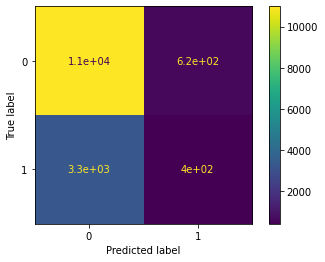

In [ ]:
plot_confusion_matrix(rfc_inter, X_val_inter, y_val_inter)

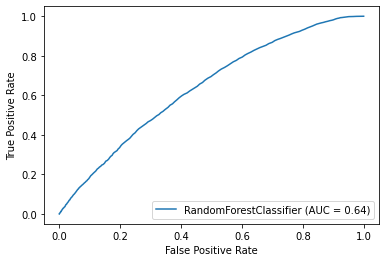

In [ ]:
plot_roc_curve(rfc_inter,X_val_inter, y_val_inter)

In [ ]:
y_preds_proba_rfc_inter = rfc_inter.predict_proba(X_val_inter)
best_threshold_inter, _ = get_best_threshold(y_val_inter, y_preds_proba_rfc_inter)

Best Threshold=0.235595, G-Mean=0.598


In [ ]:
y_pred_rfc_thr_inter = (pd.Series(y_preds_proba_rfc_inter[:,1]) >= best_threshold_inter).astype(int)
roc_auc_score(y_val_inter, y_pred_rfc_thr_inter)

0.5976233329507697

In [ ]:
y_preds_stats = (stats_logit.predict(X_val, transform=False)).to_numpy()
best_thr_stats, _ = get_best_threshold(y_val, y_preds_stats, slice_probs=False)

Best Threshold=0.240830, G-Mean=0.581


In [ ]:
y_preds_stats_thr = (pd.Series(y_preds_stats) >= best_thr_stats).astype(int)
roc_auc_score(y_val, y_preds_stats_thr)

0.5817521724619401

## Predictions

In [ ]:
def predict_on_best_threshould(model, Xs, model_type='normal', best_threshold=0.5):
    """
    Takes the model, Xs, best_threshould as input and
    returns the predictions based on the best_threshould
    """
    if model_type == 'normal':
      y_preds = model.predict_proba(Xs)
      y_preds_true = y_preds[:,1]
    elif model_type == 'stats':
      y_preds_true = model.predict(Xs, transform=False).to_numpy()
    y_preds_best_thr = (pd.Series(y_preds_true) >= best_threshold).astype(int)
    return y_preds_best_thr.to_numpy()

In [ ]:
stats_logit_full = sm.Logit(y, X).fit()
stats_logit_full.summary()

Optimization terminated successfully.
         Current function value: 0.526185
         Iterations 9


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                50882
Model:                          Logit   Df Residuals:                    50805
Method:                           MLE   Df Model:                           76
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:                 0.04507
Time:                        05:24:35   Log-Likelihood:                -26773.
converged:                       True   LL-Null:                       -28037.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Upper_Age                   0.0005      0.003      0.203      0.839      -0.005       0.006
Lower_Age                  -0.0001      0.002     -0.049      0.961      -0.004       0.004
Holding_Policy_Duration     0.0050      0.002      2.773      0.006       0.001       0.009
Reco_Policy_Premium     -1.987e-06    3.8e-06     -0.522      0.601   -9.44e-06    5.47e-06
City_C1                    -0.0707        nan        nan        nan         nan         nan
City_C10                   -0.0132        nan        nan        nan         nan         nan
City_C11                   -0.0233        nan        nan        nan         nan         nan
City_C12                   -0.0615        nan        nan        nan         nan         nan
City_C13                    0.3146        nan        nan        nan         nan         nan
City_C14                    0.0011        nan        nan        nan         nan         nan
City_C15                   -0.2109        nan        nan        nan         nan         nan
City_C16                   -0.0671        nan        nan        nan         nan         nan
City_C17                    0.0516        nan        nan        nan         nan         nan
City_C18                    0.0011        nan        nan        nan         nan         nan
City_C19                    0.4036        nan        nan        nan         nan         nan
City_C2                    -0.0367        nan        nan        nan         nan         nan
City_C20                   -0.0692        nan        nan        nan         nan         nan
City_C21                   -0.1614        nan        nan        nan         nan         nan
City_C22                    0.0590        nan        nan        nan         nan         nan
City_C23                    0.2208        nan        nan        nan         nan         nan
City_C24                    0.2073        nan        nan        nan         nan         nan
City_C25                    0.1271        nan        nan        nan         nan         nan
City_C26                   -0.0855        nan        nan        nan         nan         nan
City_C27                    0.3891        nan        nan        nan         nan         nan
City_C28                    0.3202        nan        nan        nan         nan         nan
City_C29                    0.1487        nan        nan        nan         nan         nan
City_C3                    -0.0131        nan        nan        nan         nan         nan
City_C30                    0.5291        nan        nan        nan         nan         nan
City_C31                   -0.6794        nan        nan        nan         nan         nan
City_C32                    0.6042        nan        nan        nan         nan         nan
City_C33                    0.1406        nan        nan        nan         nan         nan
City_C34                    0.4511        nan        nan        nan         nan         nan
City_C35             

In [ ]:
best_thr_stats

0.2408302653235773

In [ ]:
test_proc = pre_process_data(test, fourteenPlusConversion=25)
test_proc.head()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C30,City_C31,City_C32,City_C33,City_C34,City_C35,City_C36,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,...,InsTyp_Joint,Spouse_No,Spouse_Yes,HI_Not-Provided,HI_X1,HI_X2,HI_X3,HI_X4,HI_X5,HI_X6,HI_X7,HI_X8,HI_X9,Hol_PT_0.0,Hol_PT_1.0,Hol_PT_2.0,Hol_PT_3.0,Hol_PT_4.0,Reco_cat_1,Reco_cat_2,Reco_cat_3,Reco_cat_4,Reco_cat_5,Reco_cat_6,Reco_cat_7,Reco_cat_8,Reco_cat_9,Reco_cat_10,Reco_cat_11,Reco_cat_12,Reco_cat_13,Reco_cat_14,Reco_cat_15,Reco_cat_16,Reco_cat_17,Reco_cat_18,Reco_cat_19,Reco_cat_20,Reco_cat_21,Reco_cat_22
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50883,30,30,6.0,11934.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50884,69,68,3.0,32204.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
50885,28,28,2.0,9240.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50886,23,23,3.0,9086.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
50887,75,75,0.0,22534.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_preds_stats_full = predict_on_best_threshould(stats_logit_full, test_proc, model_type='stats', best_threshold=best_thr_stats)

In [ ]:
y_preds_stats_full

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
test_preds = test_proc.copy()
test_preds['Response'] = y_preds_stats_full
submission = test_preds['Response']

In [ ]:
submission.to_csv("/content/drive/MyDrive/Colab Notebooks/Data/AV-HealthInsurance/Submissions/preds_stats_thr_varied_cityInc.csv", index=True)

## Testing Different Cases

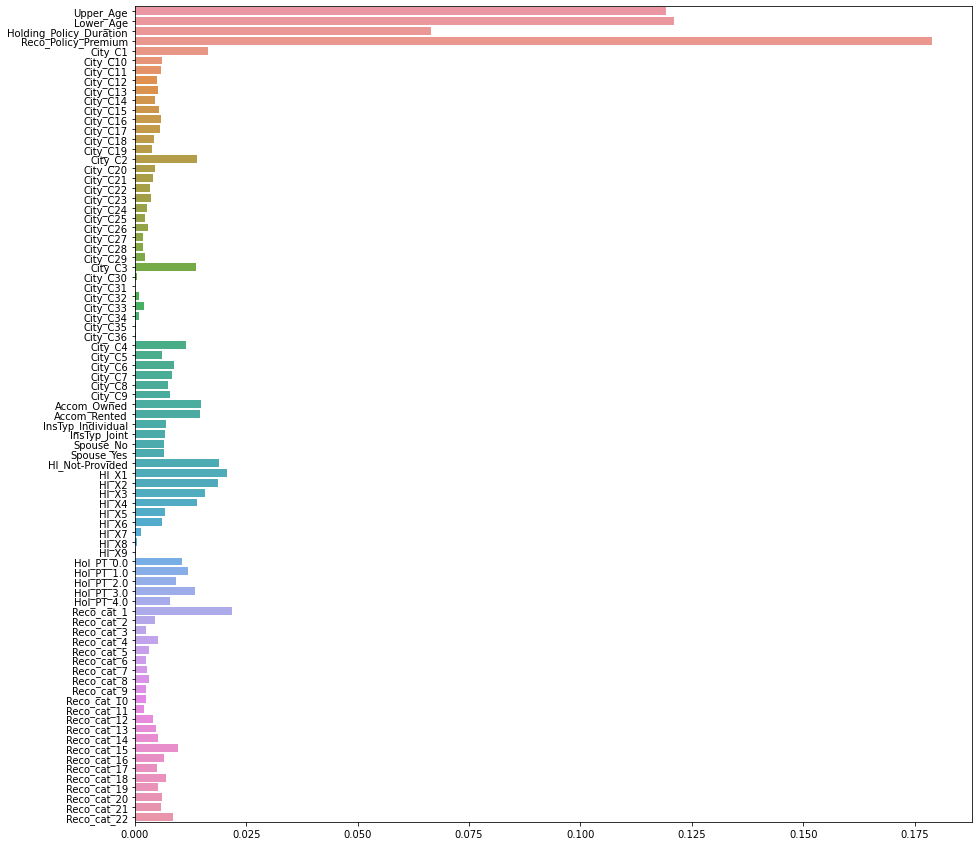

In [67]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x=rfc.feature_importances_, y=X_train.columns, orient="h")

In [68]:
train_val['City_Code'].value_counts()

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

>Lets Bundle the Cities which have less than 300 samples into a new category.

> i.e. 'C27', 'C33', 'C28', 'C32', 'C34', 'C30', 'C35', 'C36', 'C31' into a common label - 'Others'

In [79]:
merged_cities = ['C27', 'C33', 'C28', 'C32', 'C34', 'C30', 'C35', 'C36', 'C31']
train_val_case1 = train_val.copy()
train_val_case1['City_Code'].replace(merged_cities, 'Others', inplace=True)

In [101]:
train_val_case1_proc = pre_process_data(train_val_case1, fourteenPlusConversion='25')
X_case1 = train_val_case1_proc.drop('Response', axis=1)
y_case1 = train_val_case1_proc['Response']
X_train_case1, X_val_case1, y_train_case1, y_val_case1 = train_test_split(X_case1, y_case1, test_size=0.3, random_state=12)

In [102]:
rfc_case1 = RandomForestClassifier(class_weight=class_weights, n_estimators=300)
rfc_case1.fit(X_train_case1, y_train_case1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.24011005980290312,
                                     1: 0.7598899401970969},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
y_preds_rfc_case1 = rfc_case1.predict(X_val_case1)
roc_auc_score(y_val_case1, y_preds_rfc_case1)

0.5274553705618615

In [ ]:
plot_roc_curve()